In [1]:
%matplotlib inline

In [2]:
import sys
sys.path.insert(0, '/home/mehdi/github/LSSutils')
from LSSutils.lab import get_cl
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import healpy as hp

In [4]:
# read
ngal = hp.read_map('/B/Shared/mehdi/eboss/data/v7_2/0.3/eBOSS_QSO_clustering_NGC_v7_2_0.3_tot.hp512.dat.fits')
nran = hp.read_map('/B/Shared/mehdi/eboss/data/v7_2/0.3/eBOSS_QSO_clustering_NGC_v7_2_0.3_tot.hp512.ran.fits')
mask = hp.read_map('/B/Shared/mehdi/eboss/data/v7_2/0.3/mask_NGC.hp512.ran.fits') > 0

NSIDE = 512
ORDERING = RING in fits file
INDXSCHM = IMPLICIT
NSIDE = 512
ORDERING = RING in fits file
INDXSCHM = IMPLICIT
NSIDE = 512
ORDERING = RING in fits file
INDXSCHM = IMPLICIT


In [5]:
import pandas as pd

In [6]:
from LSSutils.lab import datarelease as dr

In [7]:
systematics = pd.read_hdf('/B/Shared/mehdi/templates/SDSS_WISE_HI_imageprop_nside512.h5', 'templates')
systematics = systematics[dr.cols_eboss_mocks_qso]
print(systematics.info())

systematics = systematics.values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3145728 entries, 0 to 3145727
Data columns (total 20 columns):
depth_g_minus_ebv    float64
star_density         float64
ebv                  float64
sky_g                float64
sky_r                float64
sky_i                float64
sky_z                float64
depth_g              float64
depth_r              float64
depth_i              float64
depth_z              float64
psf_g                float64
psf_r                float64
psf_i                float64
psf_z                float64
w1_med               float64
w1_covmed            float64
loghi                float64
run                  float64
airmass              float64
dtypes: float64(20)
memory usage: 504.0 MB
None


In [8]:
cl_obs = get_cl(ngal, nran, mask, systematics=None, njack=10)

In [9]:
cl_obs

{'cl_gg': {'l': array([   0,    1,    2, ..., 1533, 1534, 1535]),
  'cl': array([3.79223047e-16, 2.21886657e-06, 7.82776926e-06, ...,
         3.73847398e-06, 3.74786049e-06, 3.82331537e-06]),
  'cl_error': array([4.84431783e-06, 4.10468707e-06, 8.24673968e-06, ...,
         1.81069106e-07, 2.01777987e-07, 2.30971180e-07]),
  'njack': 10,
  'lmax': None,
  'cl_jackknifes': {-1: array([3.79223047e-16, 2.21886657e-06, 7.82776926e-06, ...,
          3.73847398e-06, 3.74786049e-06, 3.82331537e-06]),
   0: array([7.95992904e-07, 2.65419474e-06, 6.28640818e-06, ...,
          3.81335693e-06, 3.78546727e-06, 3.84490580e-06]),
   1: array([2.82108170e-06, 1.67646883e-06, 2.94289882e-06, ...,
          3.69707679e-06, 3.65559059e-06, 3.71910660e-06]),
   2: array([2.10602791e-06, 5.85836073e-06, 1.33565529e-05, ...,
          3.77690896e-06, 3.79710504e-06, 3.86735444e-06]),
   3: array([3.38319142e-10, 2.49117405e-06, 8.79200100e-06, ...,
          3.77577910e-06, 3.80769152e-06, 3.88118927e-0

In [12]:
np.mean(systematics[mask], axis=0)

array([        nan, 25.14092241,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
        2.69386788, 37.27768165, 20.23773686,         nan,         nan])

In [93]:
for s in systematics.T:
    print(np.isnan(s[mask]).sum())

42
0
42
42
42
42
42
42
42
42
42
42
42
42
42
0
0
0
42
42


In [88]:
cl_obs.keys()

dict_keys(['cl_gg', 'cl_sg', 'cl_ss'])

In [89]:
cl_obs['cl_gg']

{'l': array([   0,    1,    2, ..., 1533, 1534, 1535]),
 'cl': array([3.79223047e-16, 2.21886657e-06, 7.82776926e-06, ...,
        3.73847398e-06, 3.74786049e-06, 3.82331537e-06]),
 'cl_error': nan,
 'njack': 0,
 'lmax': None,
 'shotnoise': 3.7227952276678634e-06}

In [90]:
cl_obs['cl_sg']

[{'l': array([   0,    1,    2, ..., 1533, 1534, 1535]),
  'cl': array([nan, nan, nan, ..., nan, nan, nan]),
  'cl_error': nan,
  'njack': 0,
  'lmax': None},
 {'l': array([   0,    1,    2, ..., 1533, 1534, 1535]),
  'cl': array([ 6.42171086e-16, -9.58215688e-05, -4.27999732e-04, ...,
          8.25238089e-10, -6.70296013e-10, -1.28867621e-09]),
  'cl_error': nan,
  'njack': 0,
  'lmax': None},
 {'l': array([   0,    1,    2, ..., 1533, 1534, 1535]),
  'cl': array([nan, nan, nan, ..., nan, nan, nan]),
  'cl_error': nan,
  'njack': 0,
  'lmax': None},
 {'l': array([   0,    1,    2, ..., 1533, 1534, 1535]),
  'cl': array([nan, nan, nan, ..., nan, nan, nan]),
  'cl_error': nan,
  'njack': 0,
  'lmax': None},
 {'l': array([   0,    1,    2, ..., 1533, 1534, 1535]),
  'cl': array([nan, nan, nan, ..., nan, nan, nan]),
  'cl_error': nan,
  'njack': 0,
  'lmax': None},
 {'l': array([   0,    1,    2, ..., 1533, 1534, 1535]),
  'cl': array([nan, nan, nan, ..., nan, nan, nan]),
  'cl_error': n

In [43]:
cl_obs['cl'][-1]

3.823315372854274e-06

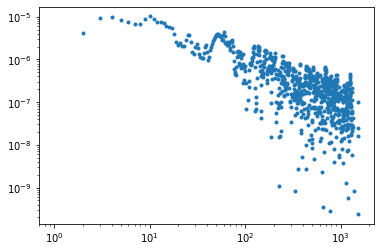

In [46]:
plt.loglog(cl_obs['cl']-cl_obs['shotnoise'], marker='.', ls='none')
# plt.ylim(1.e-6, 4.e-5)

In [63]:
def fun(a, b=None):
    print(a, b)

In [71]:
b = np.array([1, 2])
fun(1)

1 None


In [72]:
fun(1, b=b)

1 [1 2]


In [73]:
fun(1)

1 None


In [80]:
c = {'a':1, 'b':3}

In [82]:
c.values()

dict_values([1, 3])

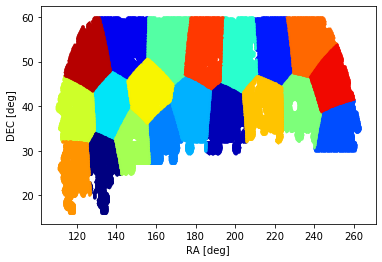

In [23]:
masks = make_jackknifes(mask, weight, visualize=True, subsample=True)

In [10]:
ell_true = np.arange(1024)
cl_true = 1.e-6*(0.001+ell_true)/(1+ell_true*ell_true)
map1 = hp.synfast(cl_true, nside=256, new=True)

Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


In [13]:
mask1 = np.ones_like(map1, '?')
weight1 = np.ones_like(map1)
maskp5 = mask1.copy()
maskp5[mask1.size//2:] = False

In [12]:
af = AnaFast()

In [16]:
cl_obs = af.run(map1, weight1, mask1)
cl_obs_half = af.run(map1, weight1, maskp5)

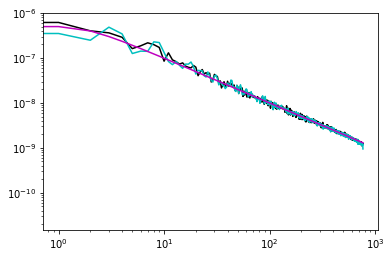

In [61]:
plt.loglog(cl_obs, 'k-',
         cl_obs_half, 'c-',
         cl_true[:cl_obs.size], 'm-')

In [24]:
a = np.array([1, 2, 3])

def foo(a):
    print(a)
    a *= 2
    print(a)


In [25]:
print(a)
foo(a)
print(a)

[1 2 3]
[1 2 3]
[2 4 6]
[2 4 6]


In [13]:
ra, dec = hpix2radec(512, np.argwhere(mask).flatten())

In [15]:
km = SphericalKMeans(n_jobs=12, n_clusters=20, tol=1.e-6)

In [16]:
km.fit_radec(ra, dec) #, sample_weight=nran[mask]/nran[mask].mean())

In [17]:
km.labels_.max()

19

Text(0, 0.5, 'DEC [deg]')

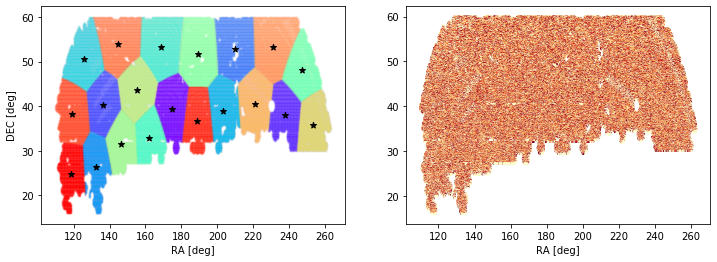

In [18]:
n_clusters = km.n_clusters
colors = [plt.cm.rainbow(i/(n_clusters-1)) for i in range(n_clusters)]


fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(12, 4))


for i in range(n_clusters):
    mask_i = km.labels_ == i
    ax1.scatter(shiftra(ra[mask_i]),
                dec[mask_i], 
                s=1,
                color=colors[i],
                alpha=0.05)
# center    
ax1.scatter(shiftra(km.centers_radec[0]),
            km.centers_radec[1], 
            color='k',
            marker='*',
            s=40)

ax2.scatter(shiftra(ra),
            dec, 
            s=1,
            c=delta,
            cmap=plt.cm.YlOrRd,
            vmin=-1.,
            vmax=1.)

ax1.set_xlabel('RA [deg]')
ax2.set_xlabel('RA [deg]')
ax1.set_ylabel('DEC [deg]')

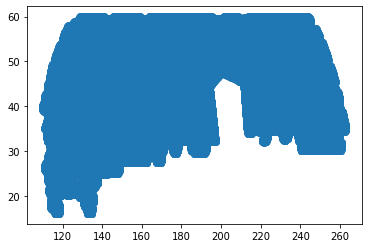

In [28]:
mask_i = km.labels_ != 5

plt.scatter(shiftra(ra[mask_i]), dec[mask_i])

In [30]:
km.get_params()

{'n_clusters': 20, 'random_state': 42}

In [ ]:
def jkmasks(mask, weight, njack=4):
    '''
    Function that makes Jackknife masks
    
    
    example
    --------
    >>> jkmasks_dic = jkmasks(mask_1, weight_1)
    >>> for k in jkmasks_dic:
    ...     hp.mollview(jkmasks_dic[k], title=k)
    
    '''
    assert mask.size == weight.size
    
    nside = hp.get_nside(mask)
    
    # --- make jackknife samples
    hpix_jk,_ = split_jackknife_new(np.argwhere(mask).flatten(),
                                    weight[mask], 
                                    njack=njack)
    masks_dic = {-1:mask}
    for jackid in range(njack):
        mask_tmp = mask.copy()
        mask_tmp[hpix_jk[jackid]] = False
        masks_dic[jackid] = mask_tmp
        
    return masks_dic

In [23]:
km.histogram(nran[mask], aggregate_by=np.sum)

array([705745.81915748, 610028.69196939, 602992.16510797, 656107.09911573,
       613955.79412648, 663084.18568933, 587407.69786179, 694844.84692061,
       571894.95816261, 541025.6268844 , 742058.80390197, 604497.97307765,
       640435.00167274, 635356.27329421, 649106.49429464, 665861.74669456,
       628643.17776388, 686180.2029978 , 623553.31001586, 576717.07885486])

In [24]:
np.mean(nran[mask])

53.39669830327993

In [25]:
y_binned = []        
for i in range(km.n_clusters):            
    indices = km.labels_ == i            
    y_binned.append(np.sum(nran[mask][indices]/nran[mask].mean(), axis=0))            
y_binned = np.array(y_binned)

In [26]:
dict(zip(np.arange(10), np.bincount(km.labels_)))

{0: 12956,
 1: 11323,
 2: 11680,
 3: 12182,
 4: 11863,
 5: 12508,
 6: 11099,
 7: 12613,
 8: 10635,
 9: 10442}

In [29]:
r = radec2r(ra, dec)

In [30]:
rmin, rmax = r.min(axis=0), r.max(axis=0)
rmin, rmax

(array([-0.8744238 , -0.85394778,  0.27473958]),
 array([-0.09636972,  0.87305718,  0.86651611]))

In [31]:
dist = (r[:, np.newaxis] - km.cluster_centers_)
sq_dist = dist*dist
sq_dist.shape

(237833, 30, 3)

In [32]:
sq_dist_tot = sq_dist.sum(axis=2)

In [33]:
distances = list()
for i in range(sq_dist_tot.shape[0]):
    distances.append((i, sq_dist_tot[i, :]))

In [34]:
indices[...] = True
indices

array([ True,  True,  True, ...,  True,  True,  True])

In [37]:
num_neighbors = indices.size // 30
labels = np.zeros(indices.size)*np.nan

for ic in range(30):    
    
    print('.', end=' ')
    i = 0
    num_sample = 0
    distances.sort(key = lambda tup: tup[1][ic])
    
    while(num_sample <= num_neighbors): 
        ix = distances[i][0]
        if indices[ix]:
            labels[ix] = ic
            indices[ix] = False
            num_sample += 1
        i += 1   
        if i == (indices.size - 1):
            print('all pixels are assigned')
            break
            
    #if i == (indices.size - 1):
    #    print('all pixels are assigned')
    #    break

. all pixels are assigned
. all pixels are assigned
. all pixels are assigned
. all pixels are assigned
. all pixels are assigned
. all pixels are assigned
. all pixels are assigned
. all pixels are assigned
. all pixels are assigned
. all pixels are assigned
. all pixels are assigned
. all pixels are assigned
. all pixels are assigned
. all pixels are assigned
. all pixels are assigned
. all pixels are assigned
. all pixels are assigned
. all pixels are assigned
. all pixels are assigned
. all pixels are assigned
. all pixels are assigned
. all pixels are assigned
. all pixels are assigned
. all pixels are assigned
. all pixels are assigned
. all pixels are assigned
. all pixels are assigned
. all pixels are assigned
. all pixels are assigned
. all pixels are assigned


0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


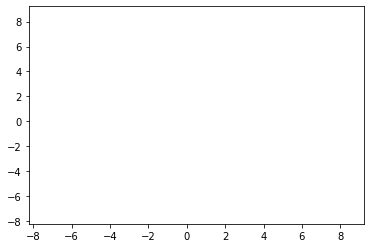

In [38]:
for i in range(30):
    print(nran[mask][labels == i].sum())
    plt.scatter(ra[labels == i], dec[labels==i], 1)

In [27]:
np.isnan(labels).sum()

1

In [71]:
np.array_equal(sq_dist_tot.argmin(axis=1), km.labels_)

True

In [110]:
el_sq_dist_tot = np.column_stack([np.arange(sq_dist_tot.shape[0]), sq_dist_tot])

In [112]:
d = np.zeros(10, dtype=[('a', 'i8'), ('b', 'f8')])

In [114]:
d['a'] = np.arange(10)

In [115]:
d['b'] = np.random.normal(size=10)

In [117]:
np.sort(d, order='b')

array([(3, -2.38673254), (1, -1.42455691), (7, -0.62159623),
       (9, -0.09451726), (4,  0.07797692), (0,  0.1427499 ),
       (5,  0.64364208), (8,  0.81740616), (6,  1.01078416),
       (2,  1.29441383)], dtype=[('a', '<i8'), ('b', '<f8')])

In [118]:
d

array([(0,  0.1427499 ), (1, -1.42455691), (2,  1.29441383),
       (3, -2.38673254), (4,  0.07797692), (5,  0.64364208),
       (6,  1.01078416), (7, -0.62159623), (8,  0.81740616),
       (9, -0.09451726)], dtype=[('a', '<i8'), ('b', '<f8')])

In [111]:
el_sq_dist_tot.sort()

array([[0.00000000e+00, 5.89459928e-01, 1.28405237e+00, ...,
        7.63607938e-02, 3.27752196e-01, 7.49567066e-01],
       [1.00000000e+00, 5.86048524e-01, 1.28078373e+00, ...,
        7.51062101e-02, 3.25329860e-01, 7.46761864e-01],
       [2.00000000e+00, 5.82645073e-01, 1.27750631e+00, ...,
        7.38644428e-02, 3.22921644e-01, 7.43953441e-01],
       ...,
       [2.37830000e+05, 8.79492908e-01, 2.24264905e+00, ...,
        4.61142893e-01, 4.10284874e-01, 1.71236188e+00],
       [2.37831000e+05, 8.75536798e-01, 2.23847613e+00, ...,
        4.59918592e-01, 4.07673292e-01, 1.70888121e+00],
       [2.37832000e+05, 8.67646451e-01, 2.23011348e+00, ...,
        4.57500821e-01, 4.02485179e-01, 1.70191537e+00]])

In [120]:
sq_dist_tot[]

array([[0.58945993, 1.28405237, 0.23443498, ..., 0.07636079, 0.3277522 ,
        0.74956707],
       [0.58604852, 1.28078373, 0.23330986, ..., 0.07510621, 0.32532986,
        0.74676186],
       [0.58264507, 1.27750631, 0.23220322, ..., 0.07386444, 0.32292164,
        0.74395344],
       ...,
       [0.87949291, 2.24264905, 0.12878718, ..., 0.46114289, 0.41028487,
        1.71236188],
       [0.8755368 , 2.23847613, 0.12785249, ..., 0.45991859, 0.40767329,
        1.70888121],
       [0.86764645, 2.23011348, 0.12602689, ..., 0.45750082, 0.40248518,
        1.70191537]])

In [77]:
dist_np = np.zeros(sq_dist_tot.shape[0], dtype=np.dtype([('ix', 'i8'), 
                                                        ('dist', 'f8', 10)]))

In [105]:
dist_np['ix'] = np.arange(sq_dist_tot.shape[0])
dist_np['dist'] = sq_dist_tot

In [123]:
sq_dist_tot_s = np.sort(dist_np, order='dist', axis=0)

In [124]:
sq_dist_tot_s

array([(222565, [0.38442196, 1.56191469, 0.02331278, 0.43696621, 0.18626598, 0.84638683, 0.23345293, 0.18989557, 0.09455713, 1.08341311]),
       ( 49513, [0.05326937, 0.39341521, 0.49177822, 0.00746388, 0.96932693, 0.08269426, 0.59927374, 0.2109192 , 0.17634215, 0.13277088]),
       ( 45637, [0.2241566 , 0.99414632, 0.12026014, 0.11212952, 0.37186558, 0.47637719, 0.14482673, 0.00282359, 0.06947741, 0.52993841]),
       ...,
       ( 73761, [0.47546776, 1.41971654, 0.06103724, 0.32356443, 0.1560526 , 0.83101428, 0.02238594, 0.03909961, 0.17079431, 0.87218677]),
       ( 33152, [0.34803447, 1.14362114, 0.11470333, 0.18798048, 0.29249641, 0.62185835, 0.07409628, 0.00480203, 0.13324644, 0.63852779]),
       (230689, [0.99509279, 2.28372505, 0.13872231, 0.92525875, 0.00542473, 1.55551644, 0.16015732, 0.40173617, 0.48065928, 1.6992271 ])],
      dtype=[('ix', '<i8'), ('dist', '<f8', (10,))])

In [102]:
sq_dist_tot_s['dist'][:, 0]

array([0.38442196, 0.05326937, 0.2241566 , ..., 0.47546776, 0.34803447,
       0.99509279])

In [87]:
sq_dist_tot_s['dist'][:, 0]

array([0.38442196, 0.05326937, 0.2241566 , ..., 0.47546776, 0.34803447,
       0.99509279])

In [88]:
sq_dist_tot_s['dist'][:, -1]

array([1.08341311, 0.13277088, 0.52993841, ..., 0.87218677, 0.63852779,
       1.6992271 ])

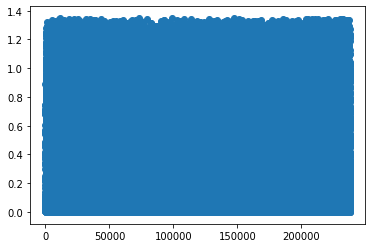

In [92]:
plt.scatter(np.arange(sq_dist_tot_s.size), sq_dist_tot_s['dist'][:, 0])